In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Visualization libraries
import plotly.express as px
from matplotlib import pyplot as plt

In [2]:
df= pd.read_csv('Masterfile.csv', sep = ',')

In [3]:
df.describe()

,"How comfortable would you be in having vaping related conversations with your parents? - From 1 - Not Comfortable at all, to 5 - Very Comfortable",Rate the following levels regarding your workplace - Job Satisfaction,Rate the following levels regarding your workplace - Happiness to come into work,Rate the following levels regarding your workplace - Workload,Rate the following levels regarding your workplace - Anxiety Level regarding work,Rate the following levels regarding your workplace - Toxicity of work environment,How many colleagues do you know vape in your workplace?
count,75.000000,75.000000,75.000000,75.000000,75.000000,75.000000,75.000000
mean,3.093333,3.586667,3.400000,3.826667,3.186667,2.173333,1.826667
std,1.552446,0.973893,1.013423,0.977771,1.193375,1.057449,3.297720
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,2.000000,3.000000,3.000000,3.000000,2.000000,1.000000,0.000000
50%,3.000000,4.000000,4.000000,4.000000,3.000000,2.000000,1.000000
75%,5.000000,4.000000,4.000000,5.000000,4.000000,3.000000,2.500000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,20.000000


In [4]:
df.drop('Recorded Date', inplace=True, axis=1)
df.drop('Response ID', inplace=True, axis=1)


In [5]:
df = df.fillna("NIL")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75 entries, 0 to 74
Data columns (total 53 columns):
 #   Column                                                                                                                                             Non-Null Count  Dtype 
---  ------                                                                                                                                             --------------  ----- 
 0   Age Range                                                                                                                                          75 non-null     object
 1   Sex                                                                                                                                                75 non-null     object
 2   Marital Status                                                                                                                                     75 non-null     object
 3   Race/Ethnicity   

In [6]:
df.columns

Index(['Age Range', 'Sex', 'Marital Status', 'Race/Ethnicity',
       'Highest Education Qualification', 'Industry Sector',
       'Type of Workplace', 'Type of Job', 'When did you join the workplace?',
       'How long have you worked in your current job?',
       'Have you vaped before?', 'What is the frequency of your vape usage?',
       'How long have you been vaping for?',
       'Why did you start vaping despite its illegality? - Selected Choice',
       'Why did you start vaping despite its illegality? - Others - Text',
       'Why did you continue vaping after trying it? - Selected Choice',
       'Why did you continue vaping after trying it? - Others - Text',
       'Do you feel vaping is healthier than smoking? If yes, why? - Selected Choice',
       'Do you feel vaping is healthier than smoking? If yes, why? - Yes - Text',
       'Do you think 2nd Hand Vape is healthier than 2nd Hand Smoke? If yes, why? - Selected Choice',
       'Do you think 2nd Hand Vape is healthier tha

## Clustering by the work background (hard clustering)

In [7]:

workdf = df[[
    'Type of Workplace',
     'Type of Job',
#     'When did you join the workplace?',
# 'How long have you worked in your current job?',
'Rate the following levels regarding your workplace - Job Satisfaction',
      'Rate the following levels regarding your workplace - Happiness to come into work',
      'Rate the following levels regarding your workplace - Workload',
      'Rate the following levels regarding your workplace - Anxiety Level regarding work',
      'Rate the following levels regarding your workplace - Toxicity of work environment',
    'How many colleagues do you know vape in your workplace?',
       'What is the attitude towards vaping in your work setting? - Selected Choice',
#     'If you were offered to vape during a client meeting by your boss or client, would you be pressured to accept? \r\nwhy? - Selected Choice',
#     'If you were offered to vape by your colleague during social situations, would you accept? (E.g during team gatherings) \r\n why? - Selected Choice'
 ]]

     

#'Age Range', 'Sex', 'Marital Status', 'Race/Ethnicity',
#'Highest Education Qualification', 'Industry Sector',
#'Type of Workplace', 'Type of Job', 'When did you join the workplace?',
#'How long have you worked in your current job?',
#'Rate the following levels regarding your workplace - Job Satisfaction',
#      'Rate the following levels regarding your workplace - Happiness to come into work',
#      'Rate the following levels regarding your workplace - Workload',
#      'Rate the following levels regarding your workplace - Anxiety Level regarding work',
#      'Rate the following levels regarding your workplace - Toxicity of work environment',

In [56]:
workdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75 entries, 0 to 74
Data columns (total 7 columns):
 #   Column                                                                             Non-Null Count  Dtype 
---  ------                                                                             --------------  ----- 
 0   When did you join the workplace?                                                   75 non-null     object
 1   Rate the following levels regarding your workplace - Job Satisfaction              75 non-null     int64 
 2   Rate the following levels regarding your workplace - Happiness to come into work   75 non-null     int64 
 3   Rate the following levels regarding your workplace - Workload                      75 non-null     int64 
 4   Rate the following levels regarding your workplace - Anxiety Level regarding work  75 non-null     int64 
 5   Rate the following levels regarding your workplace - Toxicity of work environment  75 non-null     int64 
 6   How m

In [57]:
one_hot_encoded_data = pd.get_dummies(workdf, columns = [
    # 'Age Range', 'Sex', 'Marital Status', 'Race/Ethnicity', 'Highest Education Qualification',
#     'Type of Workplace', 
    # 'Type of Job',
    'When did you join the workplace?',
#     'How long have you worked in your current job?',
#     'How many colleagues do you know vape in your workplace?',
#        'What is the attitude towards vaping in your work setting? - Selected Choice',
#     'If you were offered to vape during a client meeting by your boss or client, would you be pressured to accept? \r\nwhy? - Selected Choice',
#     'If you were offered to vape by your colleague during social situations, would you accept? (E.g during team gatherings) \r\n why? - Selected Choice'
])
workdf_aggdata = one_hot_encoded_data.copy()

In [58]:
import scipy.cluster.hierarchy as shc
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import AgglomerativeClustering

In [59]:
scaler = MinMaxScaler()
#normalise (Scale values) to 0 and 1
workdf_aggdata_np = scaler.fit_transform(workdf_aggdata)
workdf_aggdata_scaled = pd.DataFrame(workdf_aggdata_np, columns= workdf_aggdata.columns, index = workdf_aggdata.index)
workdf_aggdata_scaled

,Rate the following levels regarding your workplace - Job Satisfaction,Rate the following levels regarding your workplace - Happiness to come into work,Rate the following levels regarding your workplace - Workload,Rate the following levels regarding your workplace - Anxiety Level regarding work,Rate the following levels regarding your workplace - Toxicity of work environment,How many colleagues do you know vape in your workplace?,When did you join the workplace?_After Covid (After April 2022),When did you join the workplace?_During Covid,When did you join the workplace?_Pre-Covid (Before March 2020)
0,0.75,0.50,0.50,0.00,0.00,0.05,0.0,0.0,1.0
1,0.75,0.75,0.75,0.75,0.50,0.00,0.0,0.0,1.0
2,0.00,0.00,1.00,0.75,0.50,0.00,0.0,1.0,0.0
3,0.75,0.75,0.75,0.50,0.25,0.15,0.0,0.0,1.0
4,0.50,0.50,0.75,0.25,0.25,0.10,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
70,0.75,0.75,0.50,0.25,1.00,0.50,0.0,0.0,1.0
71,0.50,0.50,0.25,0.25,0.25,0.05,0.0,1.0,0.0
72,0.25,0.00,1.00,0.75,0.50,0.15,0.0,1.0,0.0
73,0.75,0.75,1.00,1.00,0.25,0.05,0.0,0.0,1.0


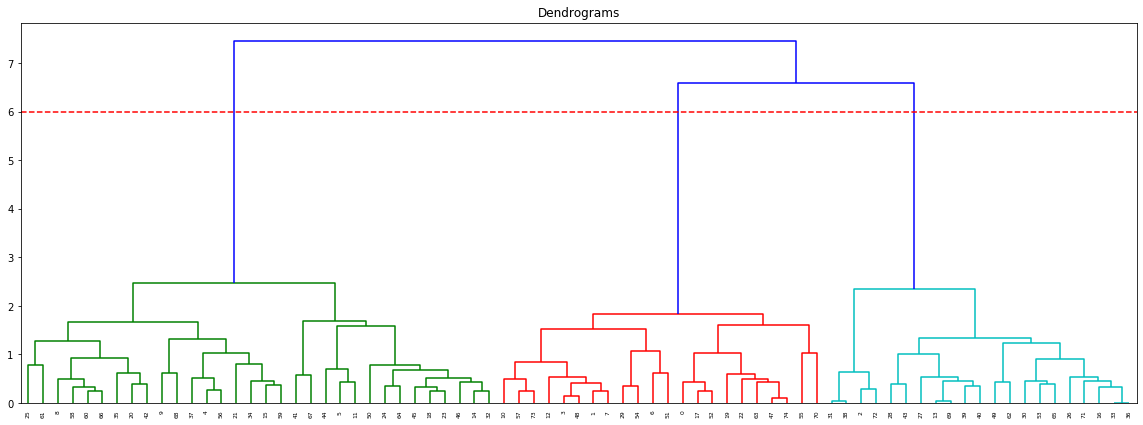

In [60]:
plt.figure(figsize=(20, 7))  
plt.title("Dendrograms") 
#the height shows the distance
plt.axhline(y=6, color='r', linestyle='--')

#methods can be one of the following: 'single', 'complete', 'average', 'centroid', 'weighted', 'median', 'ward'
dend = shc.dendrogram(shc.linkage(workdf_aggdata_scaled, method='ward'),labels=list(workdf_aggdata_scaled.index.values))


In [61]:
workModel = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')  
cluster = workModel.fit_predict(workdf_aggdata_scaled)

# fit model and predict clusters
cluster = workModel.fit_predict(workdf_aggdata_scaled)
workdf_aggdata_scaled['cluster'] = cluster
workdf_aggdata_scaled

,Rate the following levels regarding your workplace - Job Satisfaction,Rate the following levels regarding your workplace - Happiness to come into work,Rate the following levels regarding your workplace - Workload,Rate the following levels regarding your workplace - Anxiety Level regarding work,Rate the following levels regarding your workplace - Toxicity of work environment,How many colleagues do you know vape in your workplace?,When did you join the workplace?_After Covid (After April 2022),When did you join the workplace?_During Covid,When did you join the workplace?_Pre-Covid (Before March 2020),cluster
0,0.75,0.50,0.50,0.00,0.00,0.05,0.0,0.0,1.0,2
1,0.75,0.75,0.75,0.75,0.50,0.00,0.0,0.0,1.0,2
2,0.00,0.00,1.00,0.75,0.50,0.00,0.0,1.0,0.0,1
3,0.75,0.75,0.75,0.50,0.25,0.15,0.0,0.0,1.0,2
4,0.50,0.50,0.75,0.25,0.25,0.10,1.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...
70,0.75,0.75,0.50,0.25,1.00,0.50,0.0,0.0,1.0,2
71,0.50,0.50,0.25,0.25,0.25,0.05,0.0,1.0,0.0,1
72,0.25,0.00,1.00,0.75,0.50,0.15,0.0,1.0,0.0,1
73,0.75,0.75,1.00,1.00,0.25,0.05,0.0,0.0,1.0,2


In [62]:
workDecisiontree = workdf_aggdata_scaled.copy()

In [63]:
polar=workdf_aggdata_scaled.groupby("cluster").mean().reset_index()
polar=pd.melt(polar,id_vars=["cluster"])
fig2 = px.line_polar(polar, r="value", theta="variable", color="cluster", line_close=True,height=800,width=1400)
fig2.show()
print(polar)

    cluster                                           variable     value
0         0  Rate the following levels regarding your workp...  0.687500
1         1  Rate the following levels regarding your workp...  0.595238
2         2  Rate the following levels regarding your workp...  0.636364
3         0  Rate the following levels regarding your workp...  0.648438
4         1  Rate the following levels regarding your workp...  0.547619
5         2  Rate the following levels regarding your workp...  0.579545
6         0  Rate the following levels regarding your workp...  0.687500
7         1  Rate the following levels regarding your workp...  0.726190
8         2  Rate the following levels regarding your workp...  0.715909
9         0  Rate the following levels regarding your workp...  0.515625
10        1  Rate the following levels regarding your workp...  0.535714
11        2  Rate the following levels regarding your workp...  0.602273
12        0  Rate the following levels regarding yo

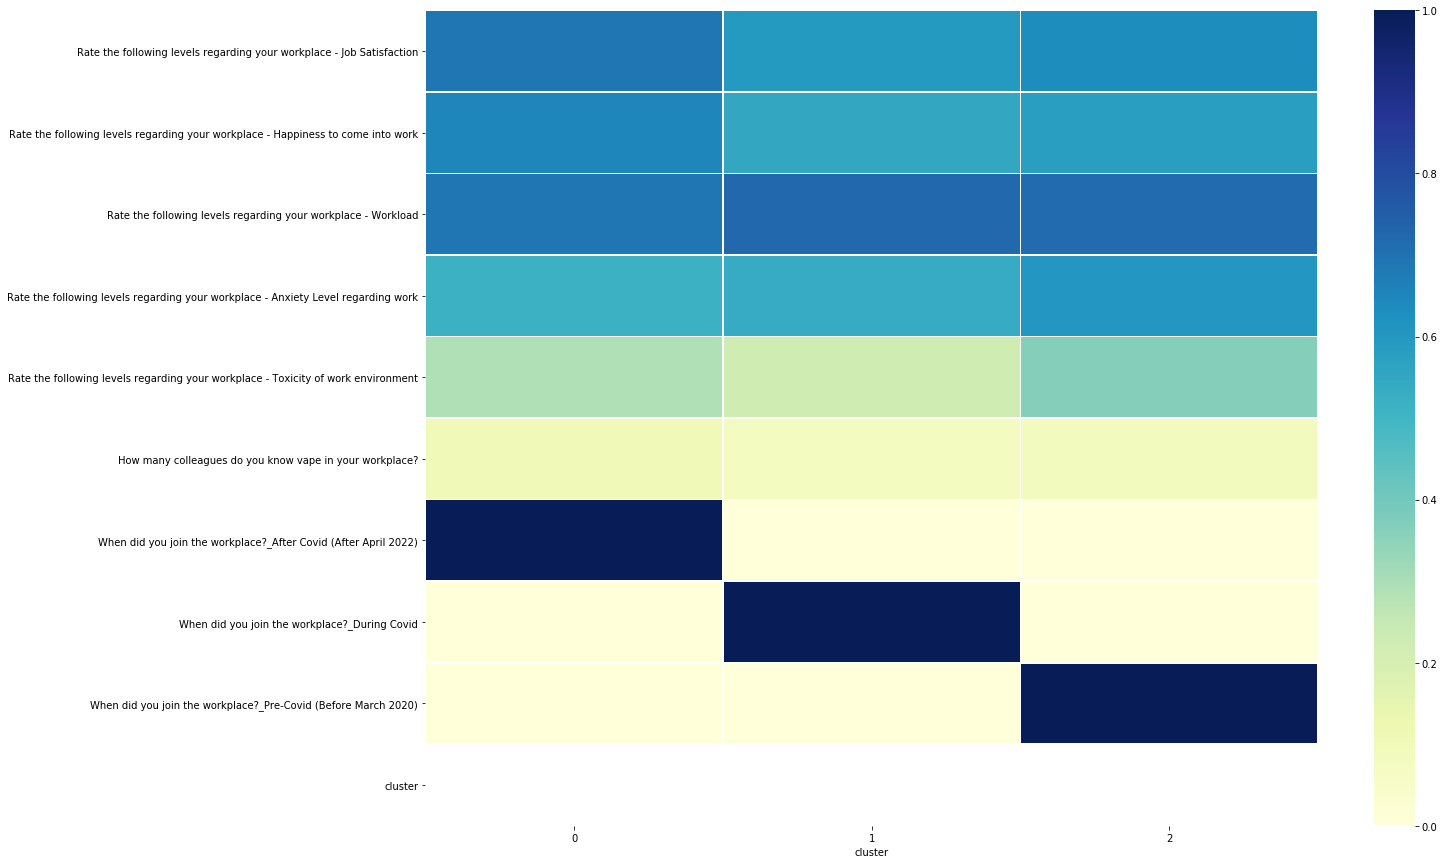

In [64]:
workdf_clust_means_wt = pd.DataFrame(workdf_aggdata_scaled.groupby('cluster').mean(), columns=workdf_aggdata_scaled.columns)
plt.subplots(figsize=(20,15))
sns.heatmap(workdf_clust_means_wt.T,  linewidths=.6, cmap="YlGnBu")

In [65]:
vaped = df["Have you vaped before?"] 
workdf_aggdata_scaled["Vaped"] = vaped
workdf_aggdata_scaled.head()

,Rate the following levels regarding your workplace - Job Satisfaction,Rate the following levels regarding your workplace - Happiness to come into work,Rate the following levels regarding your workplace - Workload,Rate the following levels regarding your workplace - Anxiety Level regarding work,Rate the following levels regarding your workplace - Toxicity of work environment,How many colleagues do you know vape in your workplace?,When did you join the workplace?_After Covid (After April 2022),When did you join the workplace?_During Covid,When did you join the workplace?_Pre-Covid (Before March 2020),cluster,Vaped
0,0.75,0.50,0.50,0.00,0.00,0.05,0.0,0.0,1.0,2,Yes
1,0.75,0.75,0.75,0.75,0.50,0.00,0.0,0.0,1.0,2,No
2,0.00,0.00,1.00,0.75,0.50,0.00,0.0,1.0,0.0,1,No
3,0.75,0.75,0.75,0.50,0.25,0.15,0.0,0.0,1.0,2,No
4,0.50,0.50,0.75,0.25,0.25,0.10,1.0,0.0,0.0,0,Yes


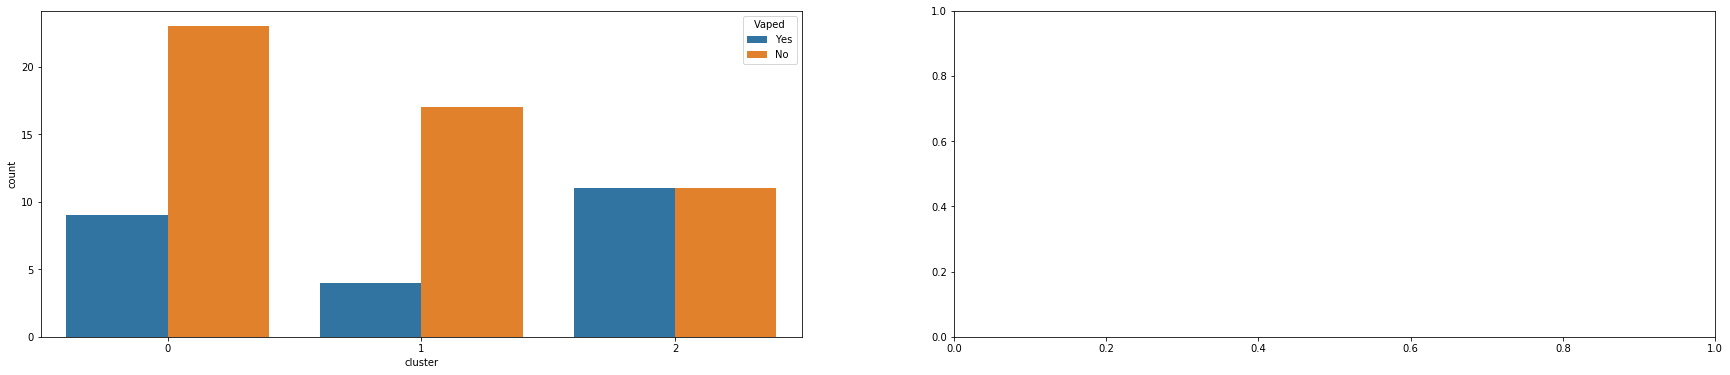

In [66]:
fig, ax = plt.subplots(1, 2 , figsize = (30,6))
sns.countplot(x = workdf_aggdata_scaled['cluster'], hue = workdf_aggdata_scaled['Vaped'], data = workdf_aggdata_scaled, ax=ax[0])


In [67]:

workdf_gmmdata= workdf_aggdata_scaled.drop('cluster', axis=1)

workdf_gmmdata= workdf_gmmdata.drop('Vaped', axis=1)
workdf_gmmdata

,Rate the following levels regarding your workplace - Job Satisfaction,Rate the following levels regarding your workplace - Happiness to come into work,Rate the following levels regarding your workplace - Workload,Rate the following levels regarding your workplace - Anxiety Level regarding work,Rate the following levels regarding your workplace - Toxicity of work environment,How many colleagues do you know vape in your workplace?,When did you join the workplace?_After Covid (After April 2022),When did you join the workplace?_During Covid,When did you join the workplace?_Pre-Covid (Before March 2020)
0,0.75,0.50,0.50,0.00,0.00,0.05,0.0,0.0,1.0
1,0.75,0.75,0.75,0.75,0.50,0.00,0.0,0.0,1.0
2,0.00,0.00,1.00,0.75,0.50,0.00,0.0,1.0,0.0
3,0.75,0.75,0.75,0.50,0.25,0.15,0.0,0.0,1.0
4,0.50,0.50,0.75,0.25,0.25,0.10,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
70,0.75,0.75,0.50,0.25,1.00,0.50,0.0,0.0,1.0
71,0.50,0.50,0.25,0.25,0.25,0.05,0.0,1.0,0.0
72,0.25,0.00,1.00,0.75,0.50,0.15,0.0,1.0,0.0
73,0.75,0.75,1.00,1.00,0.25,0.05,0.0,0.0,1.0


## Clustering by the work background (soft clustering)

In [68]:
from sklearn.mixture import GaussianMixture

In [69]:
workdf_gmm = GaussianMixture(n_components=3, max_iter = 300, n_init = 5, random_state = 99)
workdf_gmm.fit(workdf_gmmdata)

#predictions from gmm, the labels will give the cluster with the highest probability (aka proba)
workdf_labels = workdf_gmm.predict(workdf_gmmdata)


In [70]:
workdf_labels

array([2, 2, 0, 2, 1, 1, 2, 2, 1, 1, 2, 1, 2, 0, 1, 1, 0, 2, 1, 2, 1, 1,
       2, 1, 1, 1, 0, 0, 0, 2, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 1, 1, 2, 2, 0, 1, 2, 2, 0, 2, 2, 1, 2, 1, 1, 1, 1, 0, 2, 1, 0,
       1, 1, 1, 0, 2, 0, 0, 2, 2], dtype=int64)

In [71]:
# Check out the soft assignment features
probs = workdf_gmm.predict_proba(workdf_gmmdata)

# Each cluster is given a probability (i.e., proba)
workdf_gmm_output = pd.DataFrame(probs.round(3), columns = ['Cluster 0 Prob', 'Cluster 1 Prob', 'Cluster 2 Prob'])
workdf_gmm_output

,Cluster 0 Prob,Cluster 1 Prob,Cluster 2 Prob
0,0.0,0.0,1.0
1,0.0,0.0,1.0
2,1.0,0.0,0.0
3,0.0,0.0,1.0
4,0.0,1.0,0.0
...,...,...,...
70,0.0,0.0,1.0
71,1.0,0.0,0.0
72,1.0,0.0,0.0
73,0.0,0.0,1.0


In [72]:
# Taking the highest probability and assign as cluster (this is like hard clustering)
workdf_gmmdata['cluster'] = workdf_labels
workdf_gmmdata

,Rate the following levels regarding your workplace - Job Satisfaction,Rate the following levels regarding your workplace - Happiness to come into work,Rate the following levels regarding your workplace - Workload,Rate the following levels regarding your workplace - Anxiety Level regarding work,Rate the following levels regarding your workplace - Toxicity of work environment,How many colleagues do you know vape in your workplace?,When did you join the workplace?_After Covid (After April 2022),When did you join the workplace?_During Covid,When did you join the workplace?_Pre-Covid (Before March 2020),cluster
0,0.75,0.50,0.50,0.00,0.00,0.05,0.0,0.0,1.0,2
1,0.75,0.75,0.75,0.75,0.50,0.00,0.0,0.0,1.0,2
2,0.00,0.00,1.00,0.75,0.50,0.00,0.0,1.0,0.0,0
3,0.75,0.75,0.75,0.50,0.25,0.15,0.0,0.0,1.0,2
4,0.50,0.50,0.75,0.25,0.25,0.10,1.0,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...
70,0.75,0.75,0.50,0.25,1.00,0.50,0.0,0.0,1.0,2
71,0.50,0.50,0.25,0.25,0.25,0.05,0.0,1.0,0.0,0
72,0.25,0.00,1.00,0.75,0.50,0.15,0.0,1.0,0.0,0
73,0.75,0.75,1.00,1.00,0.25,0.05,0.0,0.0,1.0,2


In [73]:
polar=workdf_gmmdata.groupby("cluster").mean().reset_index()
polar=pd.melt(polar,id_vars=["cluster"])
fig3 = px.line_polar(polar, r="value", theta="variable", color="cluster", line_close=True,height=800,width=1400)
fig3.show()

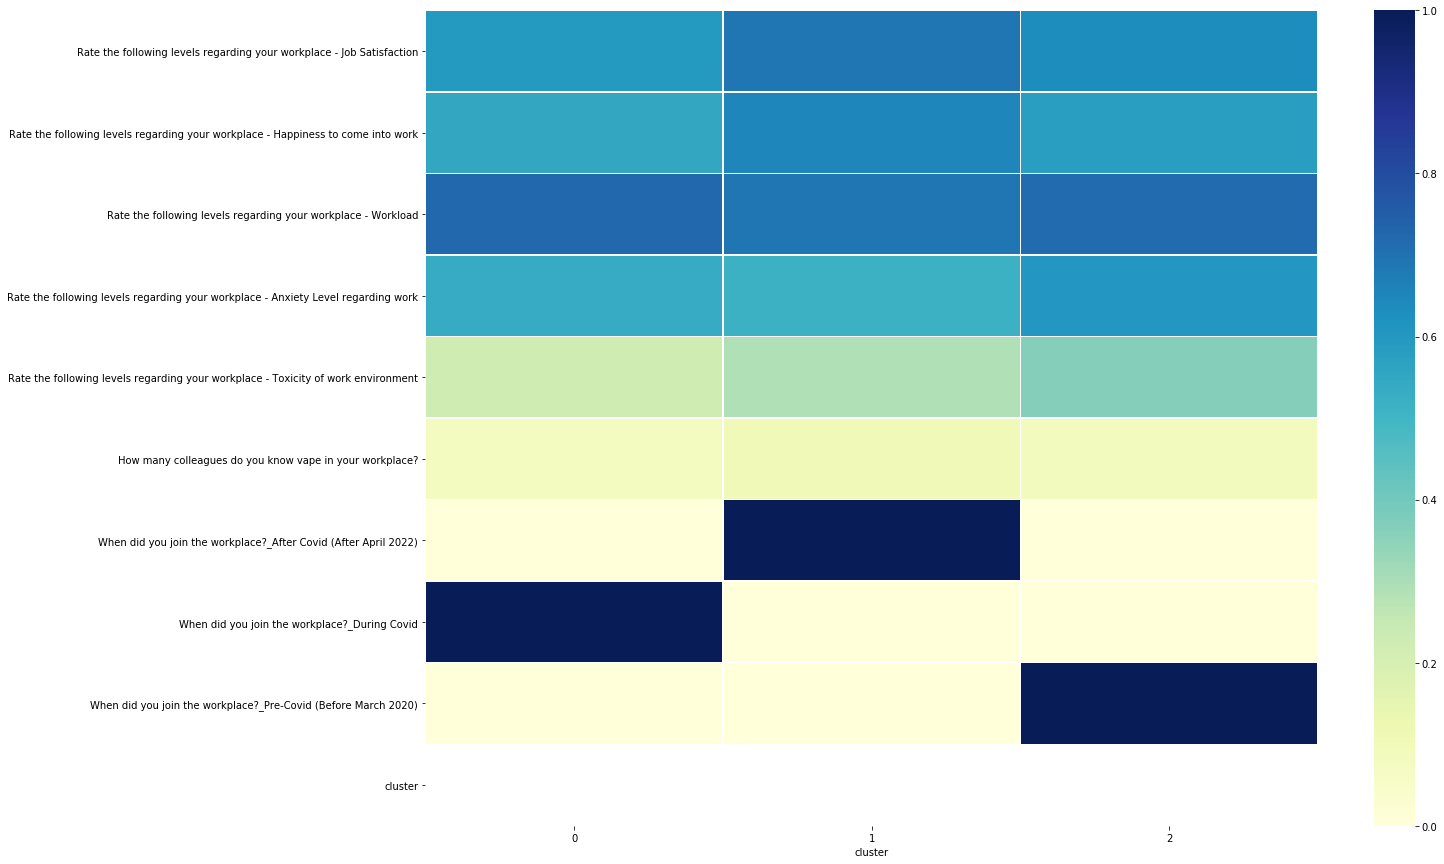

In [74]:
workdf_clust_means_gmm = pd.DataFrame(workdf_gmmdata.groupby('cluster').mean(), columns=workdf_gmmdata.columns)
plt.subplots(figsize=(20,15))
sns.heatmap(workdf_clust_means_gmm.T,  linewidths=.5, cmap="YlGnBu")

In [75]:
vaped = df["Have you vaped before?"] 
workdf_gmmdata["Vaped"] = vaped
workdf_gmmdata.head()

,Rate the following levels regarding your workplace - Job Satisfaction,Rate the following levels regarding your workplace - Happiness to come into work,Rate the following levels regarding your workplace - Workload,Rate the following levels regarding your workplace - Anxiety Level regarding work,Rate the following levels regarding your workplace - Toxicity of work environment,How many colleagues do you know vape in your workplace?,When did you join the workplace?_After Covid (After April 2022),When did you join the workplace?_During Covid,When did you join the workplace?_Pre-Covid (Before March 2020),cluster,Vaped
0,0.75,0.50,0.50,0.00,0.00,0.05,0.0,0.0,1.0,2,Yes
1,0.75,0.75,0.75,0.75,0.50,0.00,0.0,0.0,1.0,2,No
2,0.00,0.00,1.00,0.75,0.50,0.00,0.0,1.0,0.0,0,No
3,0.75,0.75,0.75,0.50,0.25,0.15,0.0,0.0,1.0,2,No
4,0.50,0.50,0.75,0.25,0.25,0.10,1.0,0.0,0.0,1,Yes


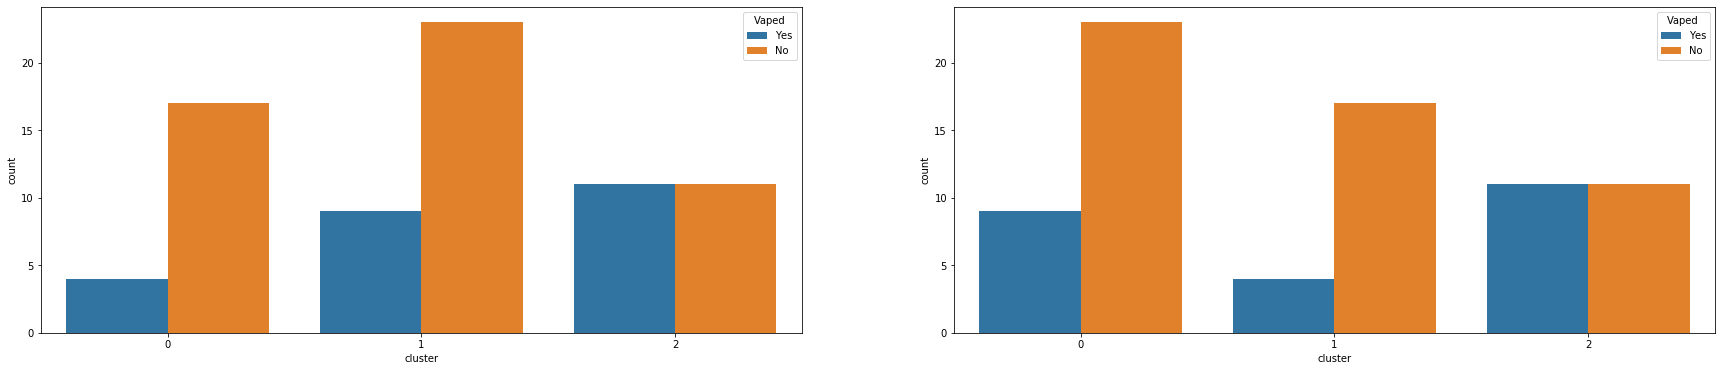

In [76]:
from sklearn.decomposition import PCA
fig, ax = plt.subplots(1, 2 , figsize = (30,6))
#soft clustering
sns.countplot(x = workdf_gmmdata['cluster'], hue = workdf_gmmdata['Vaped'], data = workdf_gmmdata, ax=ax[0])
#from the hard clustering
sns.countplot(x = workdf_aggdata_scaled['cluster'], hue = workdf_aggdata_scaled['Vaped'], data = workdf_aggdata_scaled, ax=ax[1])


In [77]:

workmodel= workdf_aggdata_scaled.drop('cluster', axis=1)

workmodel= workmodel.drop('Vaped', axis=1)
workmodel

,Rate the following levels regarding your workplace - Job Satisfaction,Rate the following levels regarding your workplace - Happiness to come into work,Rate the following levels regarding your workplace - Workload,Rate the following levels regarding your workplace - Anxiety Level regarding work,Rate the following levels regarding your workplace - Toxicity of work environment,How many colleagues do you know vape in your workplace?,When did you join the workplace?_After Covid (After April 2022),When did you join the workplace?_During Covid,When did you join the workplace?_Pre-Covid (Before March 2020)
0,0.75,0.50,0.50,0.00,0.00,0.05,0.0,0.0,1.0
1,0.75,0.75,0.75,0.75,0.50,0.00,0.0,0.0,1.0
2,0.00,0.00,1.00,0.75,0.50,0.00,0.0,1.0,0.0
3,0.75,0.75,0.75,0.50,0.25,0.15,0.0,0.0,1.0
4,0.50,0.50,0.75,0.25,0.25,0.10,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
70,0.75,0.75,0.50,0.25,1.00,0.50,0.0,0.0,1.0
71,0.50,0.50,0.25,0.25,0.25,0.05,0.0,1.0,0.0
72,0.25,0.00,1.00,0.75,0.50,0.15,0.0,1.0,0.0
73,0.75,0.75,1.00,1.00,0.25,0.05,0.0,0.0,1.0


In [78]:
pca = PCA(2)
 
#Transform the data
pc = pca.fit_transform(workmodel)
pc

array([[-4.98348982e-01, -5.81199427e-01],
       [-5.57153355e-01, -7.02542980e-01],
       [-6.24591448e-01,  7.40580908e-01],
       [-5.28555410e-01, -6.55504831e-01],
       [ 6.91424933e-01, -4.14410727e-04],
       [ 6.34678985e-01, -9.13065816e-02],
       [-6.34579345e-01, -7.15559455e-01],
       [-5.50627487e-01, -6.70899008e-01],
       [ 7.64681584e-01, -3.56732532e-02],
       [ 7.29140186e-01, -7.34311164e-02],
       [-5.36493856e-01, -6.82657412e-01],
       [ 6.57884070e-01, -1.33247564e-01],
       [-5.74079588e-01, -6.78427862e-01],
       [-4.20151364e-01,  7.89828778e-01],
       [ 6.76080471e-01, -4.08461416e-02],
       [ 7.26698202e-01, -6.52082320e-03],
       [-4.72119120e-01,  7.86685533e-01],
       [-5.00009756e-01, -6.36573689e-01],
       [ 6.51005820e-01, -3.38172926e-02],
       [-5.68161342e-01, -6.11794698e-01],
       [ 7.73521293e-01, -3.24910557e-02],
       [ 8.32715092e-01,  1.73144027e-02],
       [-5.94446825e-01, -6.56955984e-01],
       [ 6.

In [79]:
#Getting unique labels
 
u_labels = np.unique(workdf_gmmdata['cluster'])
print(u_labels)

[0 1 2]


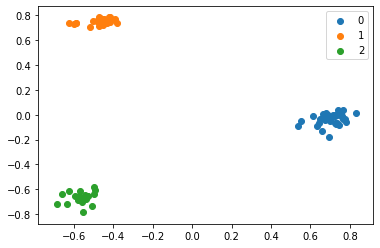

In [80]:
#plotting the results using Hierarchical clustering
for i in u_labels:
    plt.scatter(pc[workdf_aggdata_scaled['cluster'] == i , 0] , pc[workdf_aggdata_scaled['cluster'] == i, 1], label = i)
plt.legend()
plt.show()

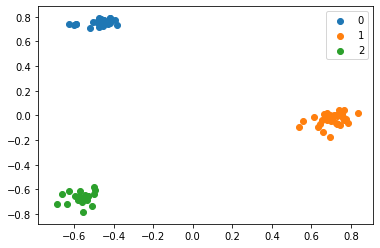

In [81]:
#plotting the results using Hierarchical clustering
for i in u_labels:
    plt.scatter(pc[workdf_gmmdata['cluster'] == i , 0] , pc[workdf_gmmdata['cluster'] == i, 1], label = i)
plt.legend()
plt.show()

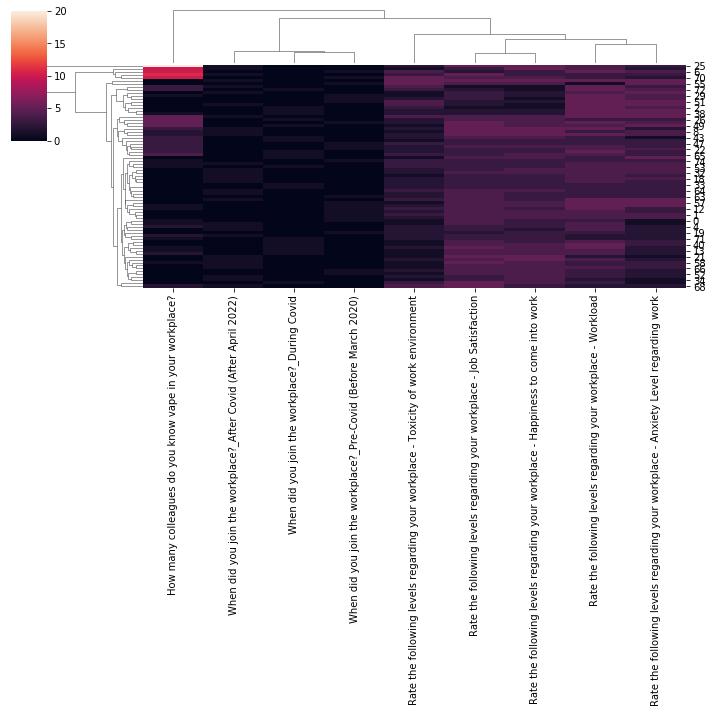

In [82]:
sns.clustermap(workdf_aggdata)

In [83]:
quit = df['Have you attempted to quit before?'] 
frequency = df['What is the frequency of your vape usage?']
workdf_aggdata_scaled["Quit before"] =quit
workdf_aggdata_scaled["Frequency"] =frequency
workdf_aggdata_scaled.head()


,Rate the following levels regarding your workplace - Job Satisfaction,Rate the following levels regarding your workplace - Happiness to come into work,Rate the following levels regarding your workplace - Workload,Rate the following levels regarding your workplace - Anxiety Level regarding work,Rate the following levels regarding your workplace - Toxicity of work environment,How many colleagues do you know vape in your workplace?,When did you join the workplace?_After Covid (After April 2022),When did you join the workplace?_During Covid,When did you join the workplace?_Pre-Covid (Before March 2020),cluster,Vaped,Quit before,Frequency
0,0.75,0.50,0.50,0.00,0.00,0.05,0.0,0.0,1.0,2,Yes,Yes,A pod a day
1,0.75,0.75,0.75,0.75,0.50,0.00,0.0,0.0,1.0,2,No,NIL,NIL
2,0.00,0.00,1.00,0.75,0.50,0.00,0.0,1.0,0.0,1,No,NIL,NIL
3,0.75,0.75,0.75,0.50,0.25,0.15,0.0,0.0,1.0,2,No,NIL,NIL
4,0.50,0.50,0.75,0.25,0.25,0.10,1.0,0.0,0.0,0,Yes,Yes,Only during social situations


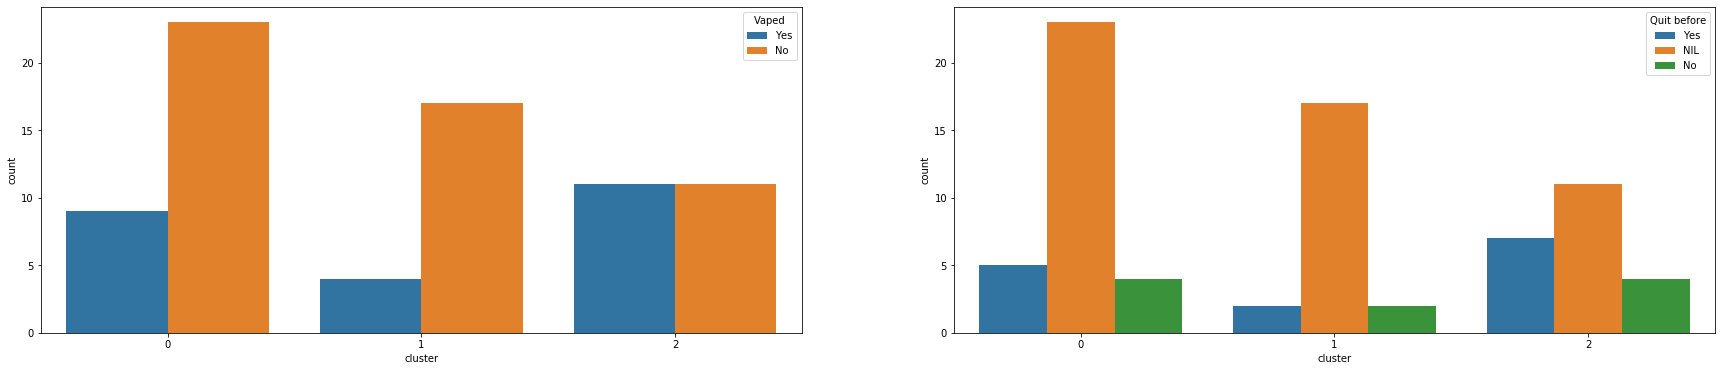

In [84]:
fig, ax = plt.subplots(1, 2 , figsize = (30,6))

sns.countplot(x = workdf_aggdata_scaled['cluster'], hue = workdf_aggdata_scaled['Quit before'], data = workdf_aggdata_scaled, ax=ax[1])

sns.countplot(x = workdf_aggdata_scaled['cluster'], hue = workdf_aggdata_scaled['Vaped'], data = workdf_aggdata_scaled, ax=ax[0])

In [85]:
 workdf_aggdata_scaled.groupby(["cluster","Vaped","Frequency","Quit before"])["Quit before"].count()

cluster  Vaped  Frequency                      Quit before
0        No     NIL                            NIL            23
         Yes    A pod a week                   No              1
                                               Yes             2
                More than a pod a week         Yes             1
                Only during social situations  No              2
                                               Yes             2
                Tried once                     No              1
1        No     NIL                            NIL            17
         Yes    A pod a day                    Yes             1
                Only during social situations  No              2
                Tried once                     Yes             1
2        No     NIL                            NIL            11
         Yes    A pod a day                    Yes             1
                A pod a week                   Yes             1
                More than a pod

<h1>Decision Tree</h1>

In [86]:
# Import DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier

# Import train_test_split functions
from sklearn.model_selection import train_test_split

# Import accuracy_score
from sklearn.metrics import accuracy_score

In [90]:
# Instantiate dt and criterion can be gini or entropy
dt = DecisionTreeClassifier(criterion = 'gini', max_depth = 3, random_state = 99)

In [91]:
x = workDecisiontree.drop(columns='cluster')
y = workDecisiontree['cluster']

In [92]:
workDecisiontree

,Rate the following levels regarding your workplace - Job Satisfaction,Rate the following levels regarding your workplace - Happiness to come into work,Rate the following levels regarding your workplace - Workload,Rate the following levels regarding your workplace - Anxiety Level regarding work,Rate the following levels regarding your workplace - Toxicity of work environment,How many colleagues do you know vape in your workplace?,When did you join the workplace?_After Covid (After April 2022),When did you join the workplace?_During Covid,When did you join the workplace?_Pre-Covid (Before March 2020),cluster
0,0.75,0.50,0.50,0.00,0.00,0.05,0.0,0.0,1.0,2
1,0.75,0.75,0.75,0.75,0.50,0.00,0.0,0.0,1.0,2
2,0.00,0.00,1.00,0.75,0.50,0.00,0.0,1.0,0.0,1
3,0.75,0.75,0.75,0.50,0.25,0.15,0.0,0.0,1.0,2
4,0.50,0.50,0.75,0.25,0.25,0.10,1.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...
70,0.75,0.75,0.50,0.25,1.00,0.50,0.0,0.0,1.0,2
71,0.50,0.50,0.25,0.25,0.25,0.05,0.0,1.0,0.0,1
72,0.25,0.00,1.00,0.75,0.50,0.15,0.0,1.0,0.0,1
73,0.75,0.75,1.00,1.00,0.25,0.05,0.0,0.0,1.0,2


In [93]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, 
                                                          stratify = y,
                                                          random_state = 99)

In [94]:
# Fit dt to the training set
dt.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=99, splitter='best')

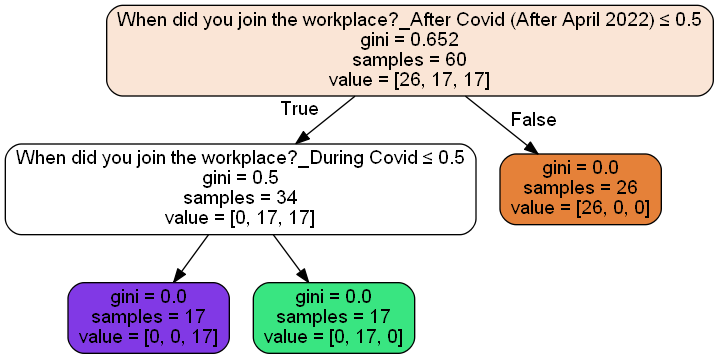

In [95]:
from sklearn.tree import export_graphviz
import pydotplus
#from sklearn.externals.six import StringIO  
import six
from six import StringIO
from IPython.display import Image

feature_cols = X_train.columns

dot_data = StringIO()
export_graphviz(dt, out_file = dot_data, 
                      feature_names = feature_cols,  
                     filled = True, rounded = True,  
                    special_characters = True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('bankTree.png')
Image(graph.create_png())

In [96]:
feat_impt = pd.Series(dt.feature_importances_, index = X_train.columns)

# Sort the variable importance
sorted_feat_impt = feat_impt.sort_values()


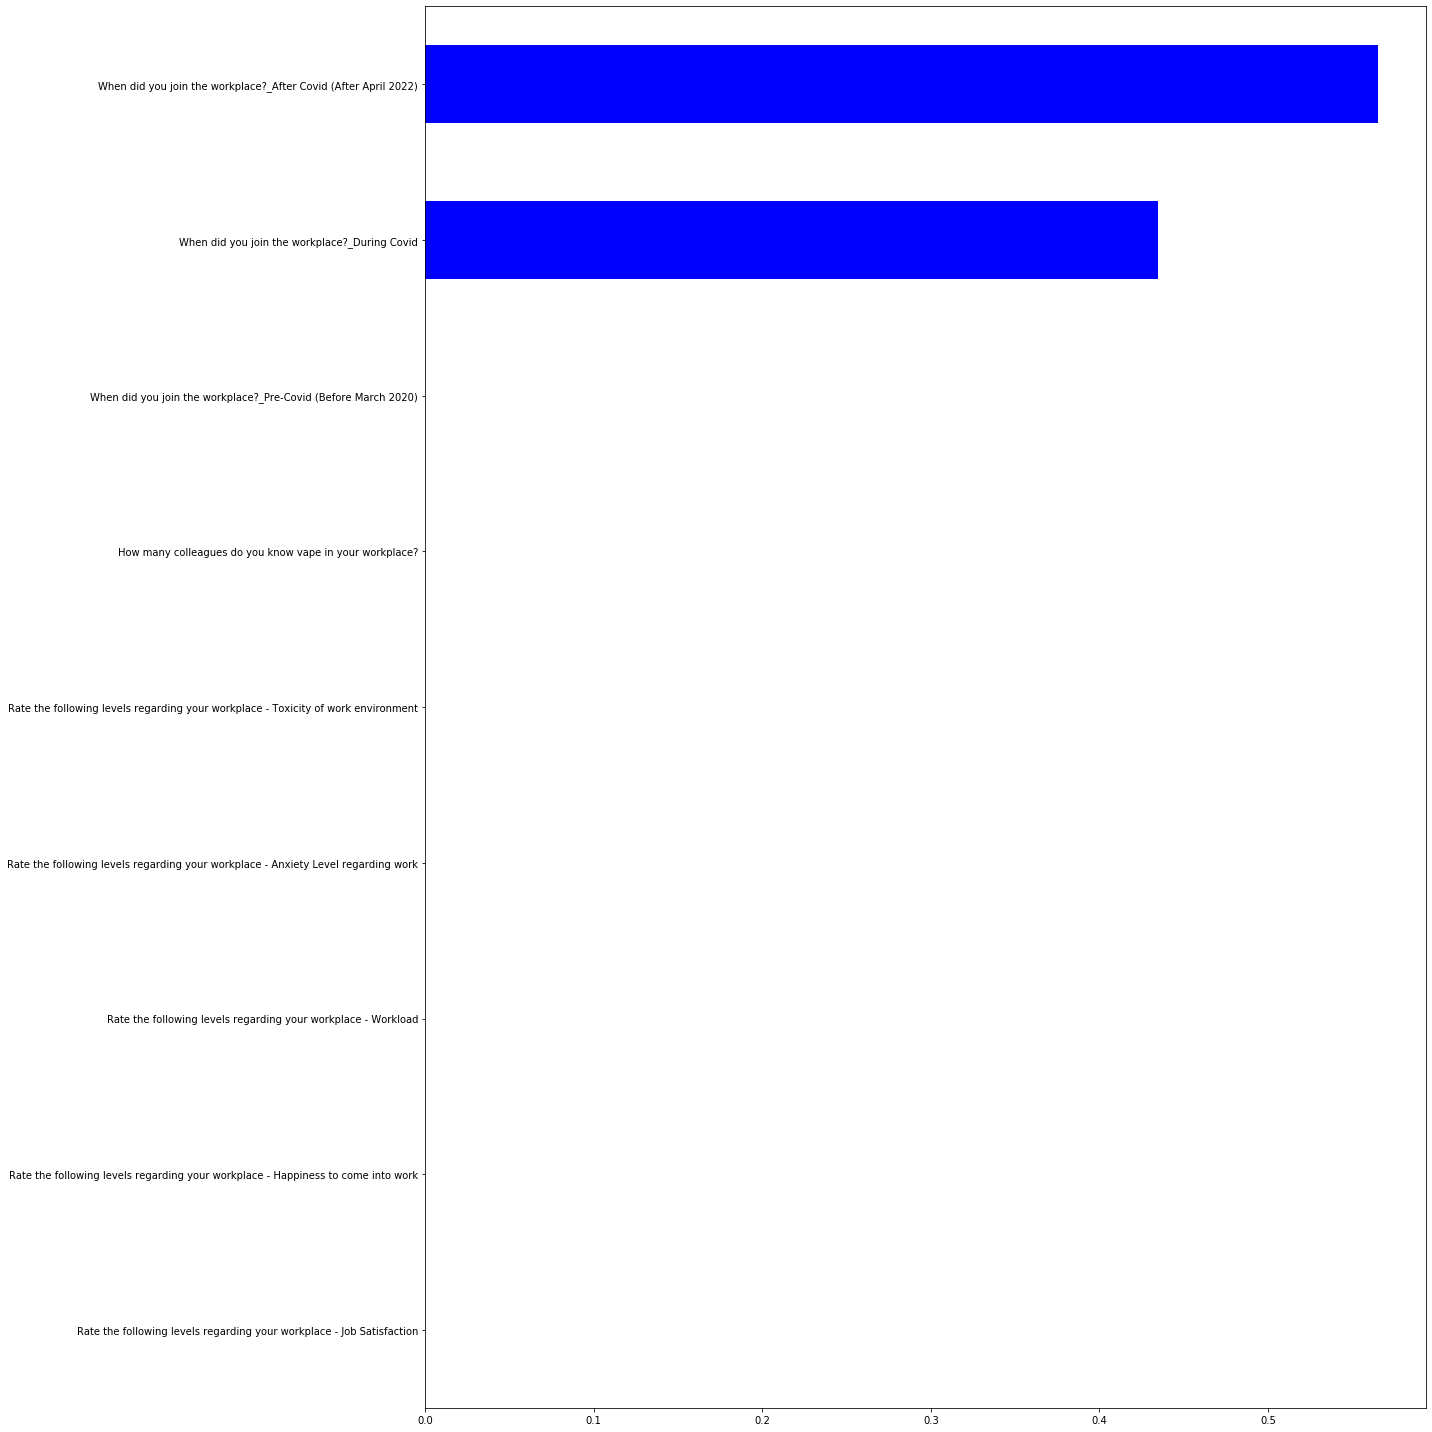

In [97]:
# Make a horizontal bar plot
sorted_feat_impt.plot(kind='barh', color='blue', figsize = (20,20))
plt.tight_layout()
plt.show()

In [98]:
# Predict test set labels
y_pred = dt.predict(X_test)
print(y_pred)

[2 1 1 2 0 0 1 0 2 0 0 0 2 2 1]


In [99]:
#Print the accuracy of labels predicted.

print("Accuracy for Decision Tree :")
print(round(accuracy_score(y_test, y_pred), 3)) #comparing the actual target with the prediction

Accuracy for Decision Tree :
1.0


In [101]:
quit = df['Have you attempted to quit before?'] 
frequency = df['What is the frequency of your vape usage?']
workdf_gmmdata["Quit before"] =quit
workdf_gmmdata["Frequency"] =frequency
workdf_gmmdata.head()


,Rate the following levels regarding your workplace - Job Satisfaction,Rate the following levels regarding your workplace - Happiness to come into work,Rate the following levels regarding your workplace - Workload,Rate the following levels regarding your workplace - Anxiety Level regarding work,Rate the following levels regarding your workplace - Toxicity of work environment,How many colleagues do you know vape in your workplace?,When did you join the workplace?_After Covid (After April 2022),When did you join the workplace?_During Covid,When did you join the workplace?_Pre-Covid (Before March 2020),cluster,Vaped,Quit before,Frequency
0,0.75,0.50,0.50,0.00,0.00,0.05,0.0,0.0,1.0,2,Yes,Yes,A pod a day
1,0.75,0.75,0.75,0.75,0.50,0.00,0.0,0.0,1.0,2,No,NIL,NIL
2,0.00,0.00,1.00,0.75,0.50,0.00,0.0,1.0,0.0,0,No,NIL,NIL
3,0.75,0.75,0.75,0.50,0.25,0.15,0.0,0.0,1.0,2,No,NIL,NIL
4,0.50,0.50,0.75,0.25,0.25,0.10,1.0,0.0,0.0,1,Yes,Yes,Only during social situations


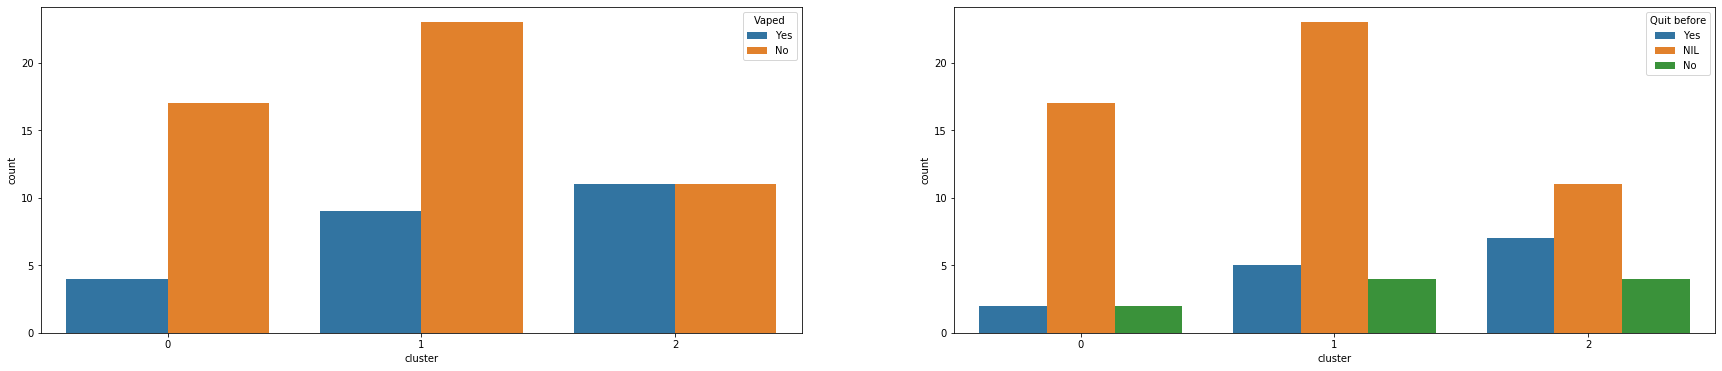

In [102]:
fig, ax = plt.subplots(1, 2 , figsize = (30,6))

sns.countplot(x = workdf_gmmdata['cluster'], hue = workdf_gmmdata['Quit before'], data = workdf_gmmdata, ax=ax[1])

sns.countplot(x = workdf_gmmdata['cluster'], hue =workdf_gmmdata['Vaped'], data = workdf_gmmdata, ax=ax[0])

In [103]:
workdf_gmmdata.groupby(["cluster","Vaped","Frequency"])["Quit before"].count()

cluster  Vaped  Frequency                    
0        No     NIL                              17
         Yes    A pod a day                       1
                Only during social situations     2
                Tried once                        1
1        No     NIL                              23
         Yes    A pod a week                      3
                More than a pod a week            1
                Only during social situations     4
                Tried once                        1
2        No     NIL                              11
         Yes    A pod a day                       1
                A pod a week                      1
                More than a pod a week            2
                Only during social situations     5
                Tried once                        2
Name: Quit before, dtype: int64

In [104]:
plotdata = pd.DataFrame({
    "Cluster 0":[17,4],
    "Cluster 1":[23,9],
    "Cluster 2":[11,11]
    }, index = ["No","Yes"]
)
plotdata.head()

,Cluster 0,Cluster 1,Cluster 2
No,17,23,11
Yes,4,9,11


In [105]:
plotdata.transpose()

,No,Yes
Cluster 0,17,4
Cluster 1,23,9
Cluster 2,11,11


Text(0, 0.5, 'Percentage of respondent that vaped')

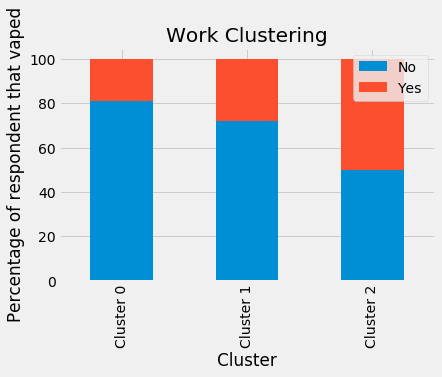

In [106]:
import matplotlib
matplotlib.style.use('fivethirtyeight') 
plotdata.transpose().apply(lambda x: x*100/sum(x), axis=1).plot(kind="bar", stacked=True)
plt.title("Work Clustering")
plt.xlabel("Cluster")
plt.ylabel("Percentage of respondent that vaped")
#https://www.shanelynn.ie/bar-plots-in-python-using-pandas-dataframes/
#https://www.geeksforgeeks.org/how-to-show-values-on-seaborn-barplot/

In [107]:
plotdata2 = pd.DataFrame({
    "Cluster 0":[1,0,0,1,2],
    "Cluster 1":[1,3,1,0,4],
    "Cluster 2":[2,1,2,1,5],
    }, index = ["Tried once","A pod a week","More than a pod a week","A pod a day","Only during social situations"]
)
plotdata2.head()
plotdata2.transpose()

,Tried once,A pod a week,More than a pod a week,A pod a day,Only during social situations
Cluster 0,1,0,0,1,2
Cluster 1,1,3,1,0,4
Cluster 2,2,1,2,1,5


Text(0, 0.5, 'Percentage of respondent that vaped')

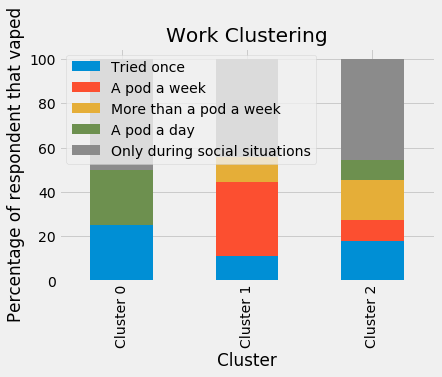

In [108]:
import matplotlib
matplotlib.style.use('fivethirtyeight') 
plotdata2.transpose().apply(lambda x: x*100/sum(x), axis=1).plot(kind="bar", stacked=True)
plt.title("Work Clustering")
plt.xlabel("Cluster")
plt.ylabel("Percentage of respondent that vaped")

<h1>Logistic Regression</h1>

In [295]:
# Import DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier

# Import train_test_split functions
from sklearn.model_selection import train_test_split

# Import accuracy_score
from sklearn.metrics import accuracy_score

In [296]:
x = workDecisiontree
y = df['Have you vaped before?'].map({'Yes':1,'No':0})

In [297]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, 
                                                          stratify = y,
                                                          random_state = 99)

In [298]:
from sklearn.linear_model import LogisticRegression
lmodel = LogisticRegression(penalty='l1',solver = 'liblinear', random_state = 99)

lmodel.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l1',
                   random_state=99, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [299]:
lmodel.coef_

array([[ 0.        ,  0.        , -0.69353503,  0.        ,  0.04116149,
        -0.10887778, -0.38839655,  0.48803981,  0.22202614]])

In [300]:
# Store the coefficients in a Series along with the column names
lm_coef = pd.DataFrame(lmodel.coef_[0], index = x.columns, columns = ["importance"])
lm_coef = lm_coef.sort_values(by = ["importance"], ascending=False)
lm_coef
# Sort the absolute values of the coefficients 
# sorted_coef = lm_coef.sort_values(key=pd.Series.abs)

,importance
When did you join the workplace?_Pre-Covid (Before March 2020),0.488040
cluster,0.222026
Rate the following levels regarding your workplace - Toxicity of work environment,0.041161
Rate the following levels regarding your workplace - Job Satisfaction,0.000000
Rate the following levels regarding your workplace - Happiness to come into work,0.000000
Rate the following levels regarding your workplace - Anxiety Level regarding work,0.000000
When did you join the workplace?_After Covid (After April 2022),-0.108878
When did you join the workplace?_During Covid,-0.388397
Rate the following levels regarding your workplace - Workload,-0.693535


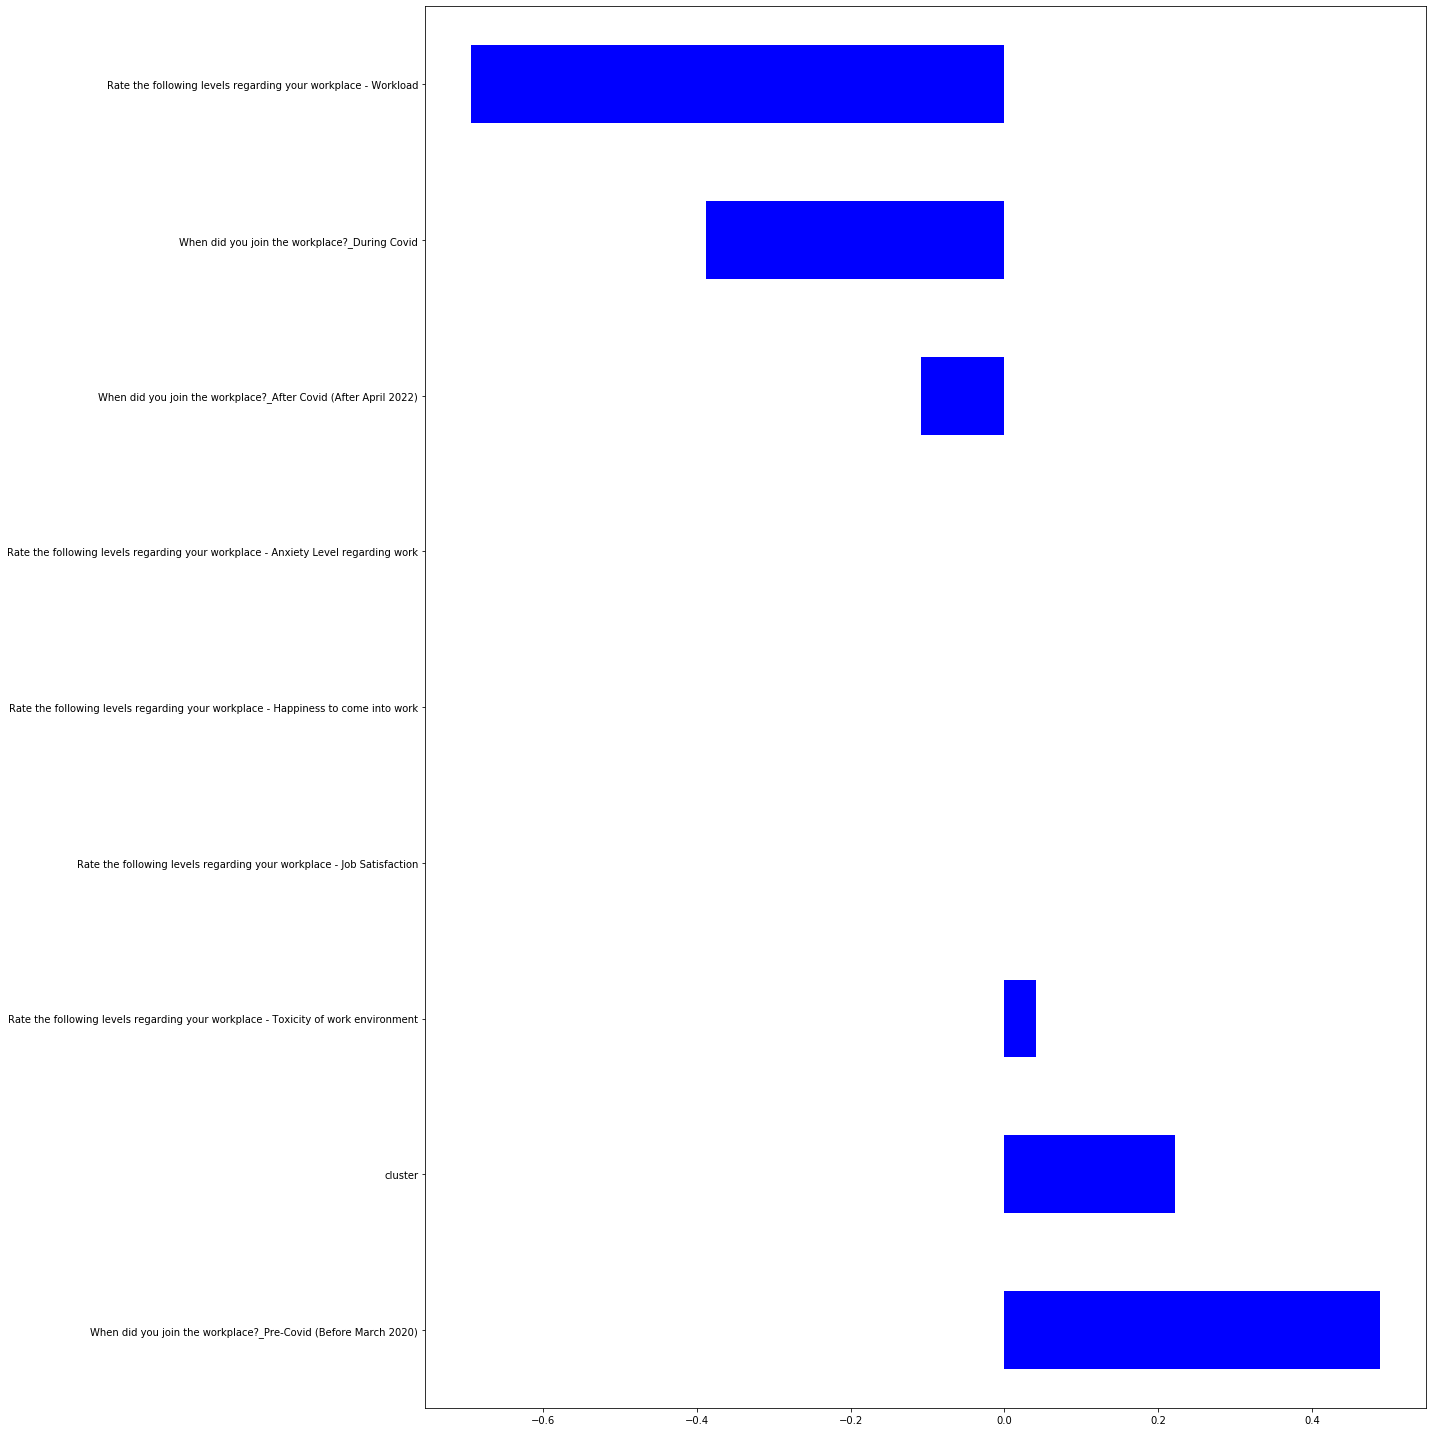

In [303]:
# Make a horizontal bar plot

# find out the odds of being successful and being a factor
lm_coef["importance"].plot(kind='barh', color='blue', figsize = (20,20))
plt.tight_layout()
plt.show()

In [304]:
lm_coef = lm_coef[lm_coef["importance"] != 0]
lm_coef

,importance
When did you join the workplace?_Pre-Covid (Before March 2020),0.488040
cluster,0.222026
Rate the following levels regarding your workplace - Toxicity of work environment,0.041161
When did you join the workplace?_After Covid (After April 2022),-0.108878
When did you join the workplace?_During Covid,-0.388397
Rate the following levels regarding your workplace - Workload,-0.693535


In [305]:
y_pred1 = lmodel.predict(X_test)

print("Accuracy for LogisticRegression :")
print(round(accuracy_score(y_test, y_pred1),2))

Accuracy for LogisticRegression :
0.53
